# Цветовые пространства

## RGB
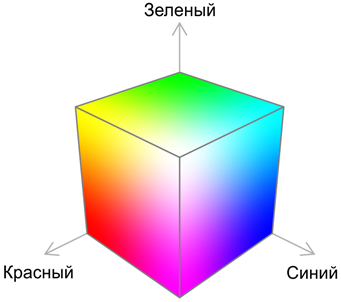

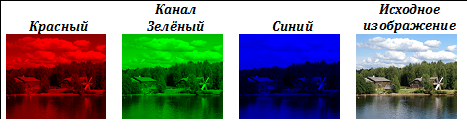

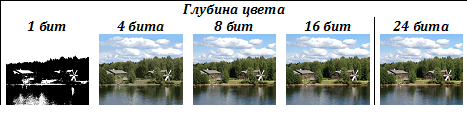

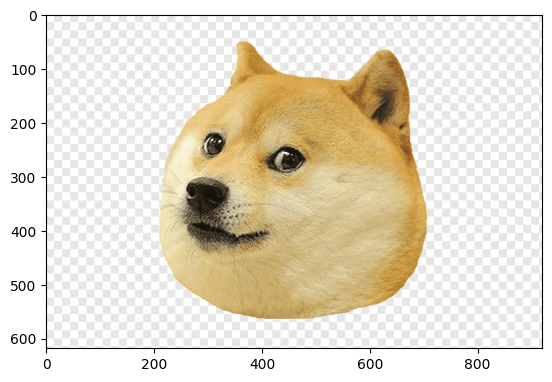

In [36]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('assets/lesson1/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

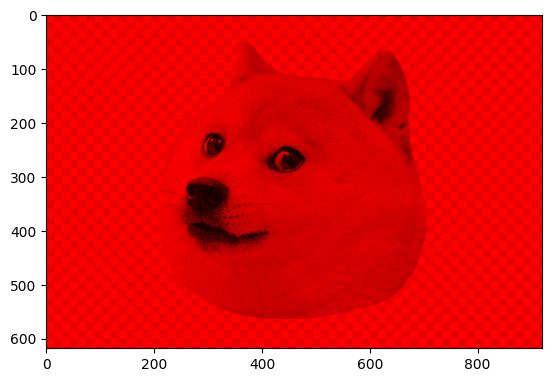

In [37]:
image_red = image.copy()
image_red[:, :, [1,2]] *= 0
plt.imshow(image_red)

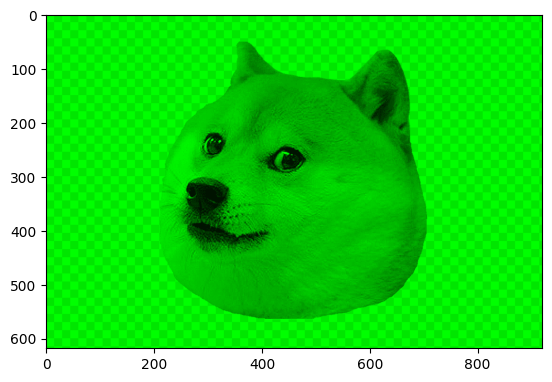

In [38]:
image_green = image.copy()
image_green[:, :, [0,2]] *= 0
plt.imshow(image_green)

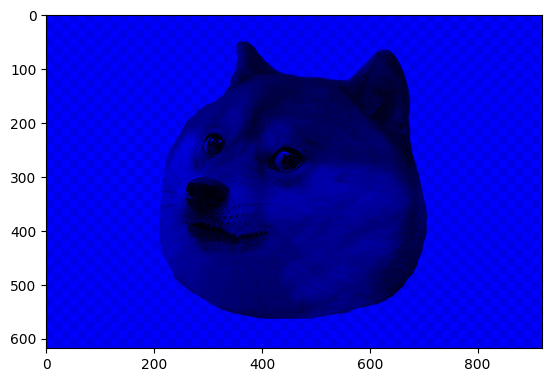

In [39]:
image_blue = image.copy()
image_blue[:, :, [0,1]] *= 0
plt.imshow(image_blue)

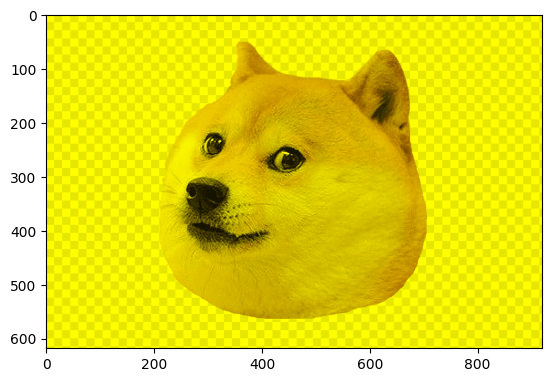

In [41]:
image_yellow = image.copy()
image_yellow[:, :, 2] *= 0
plt.imshow(image_yellow)

## HSV (ну или HSI)

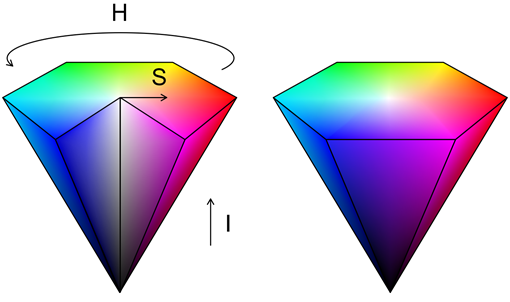

H - тон (вокруг оси красного цвета)

S - чистота цвета (чем ближе к нулю тем больше он похож на серый)

I - интенсивность

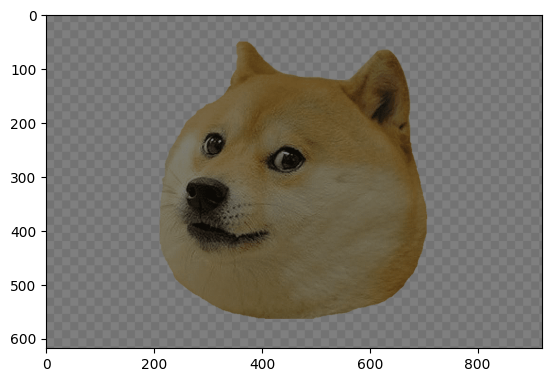

In [51]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('assets/lesson1/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image[:, :, 2] //= 2
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)

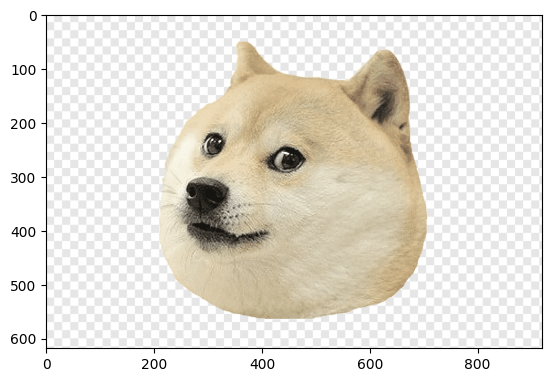

In [52]:
image = cv2.imread('assets/lesson1/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image[:, :, 1] //= 2
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)

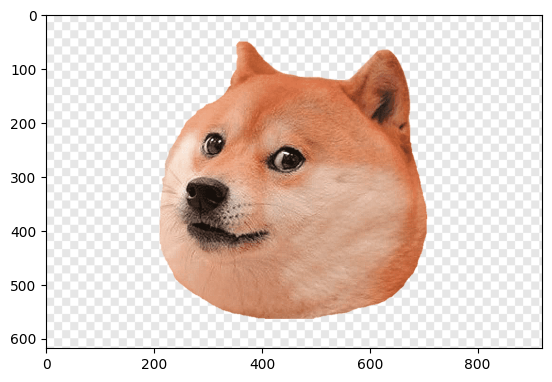

In [53]:
image = cv2.imread('assets/lesson1/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image[:, :, 0] //= 2
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)

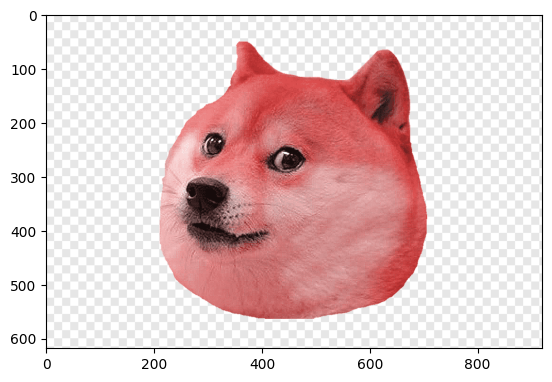

In [54]:
image = cv2.imread('assets/lesson1/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image[:, :, 0] *= 0
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(image)

Есть много еще других форматов цветовых пространств, но в нашем курсе они нам не нужны :)

# PNG

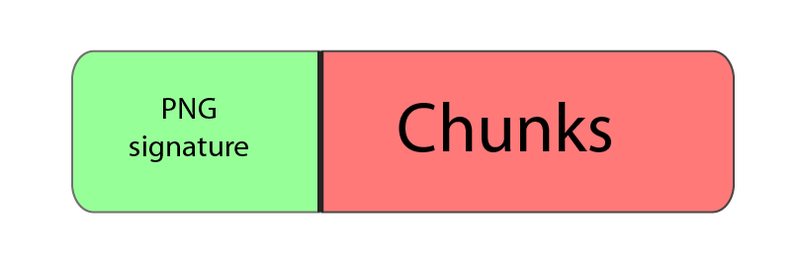

Подпись всегда одинакова и состоит из **89 50 4E 47 0D 0A 1A 0A**

In [10]:
print(open('assets/lesson1/1.png', 'rb').read(8).hex() == open('assets/lesson1/2.png', 'rb').read(8).hex())
print(open('assets/lesson1/2.png', 'rb').read(8).hex())

True
89504e470d0a1a0a


In [19]:
file = open('assets/lesson1/1.png', 'rb')
sign = file.read(8)

for _ in range(5):
    length = int.from_bytes(file.read(4))
    type = file.read(4)
    chunk = file.read(length)
    crc = file.read(4)
    print(length, type.hex(), chunk.hex()[:4], crc.hex())

13 49484452 0000 793b1f29
117 504c5445 e6e6 7f0403ed
8192 49444154 78da 43668957
8192 49444154 8e95 e3353ec3
8192 49444154 5a69 0751e9ac


Использует алгоритм сжатия DEFLATE, который по большей части использует кодирование Хаффмана

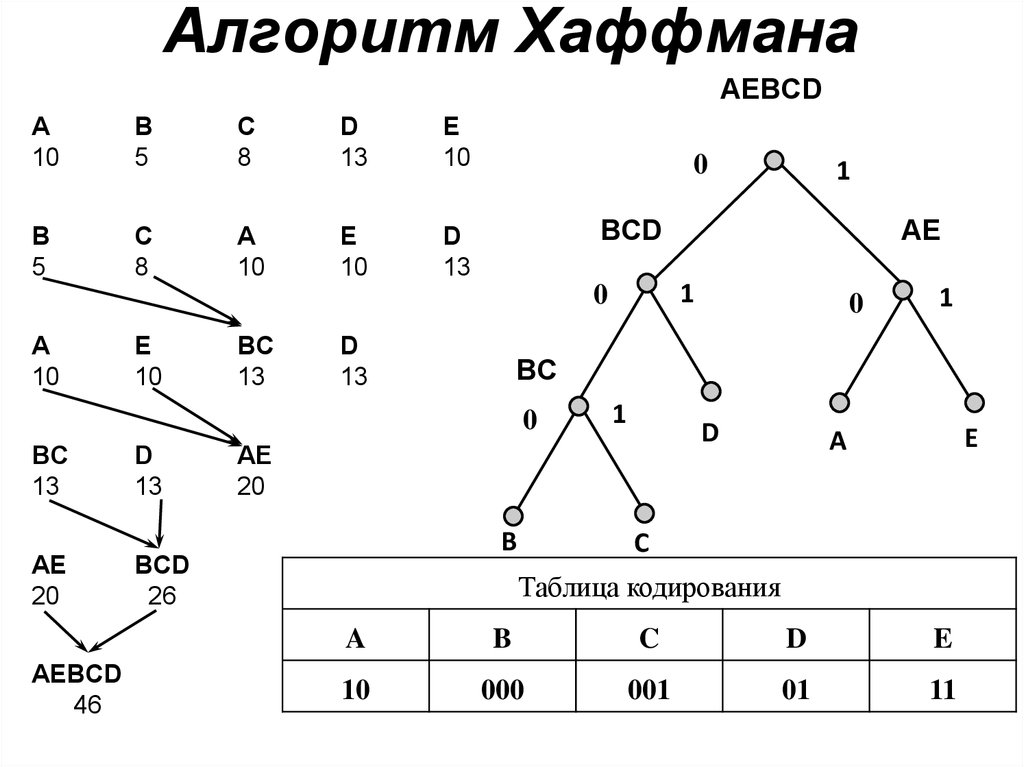

Также PNG может хранить дополнительный канал (помимо RGB) - канал прозрачности или альфа-канал. Таким образом PNG - сжатый формат без потерь и дополнительным 4ым каналом.

(618, 920, 4)


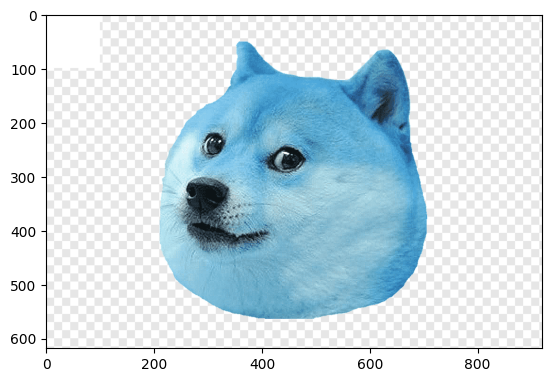

In [33]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
print(image.shape)
image[:100, :100, 3] = 0
plt.imshow(image)

# JPEG

Немного более сложный формат изображения, который можно описать алгоритмом сжатия

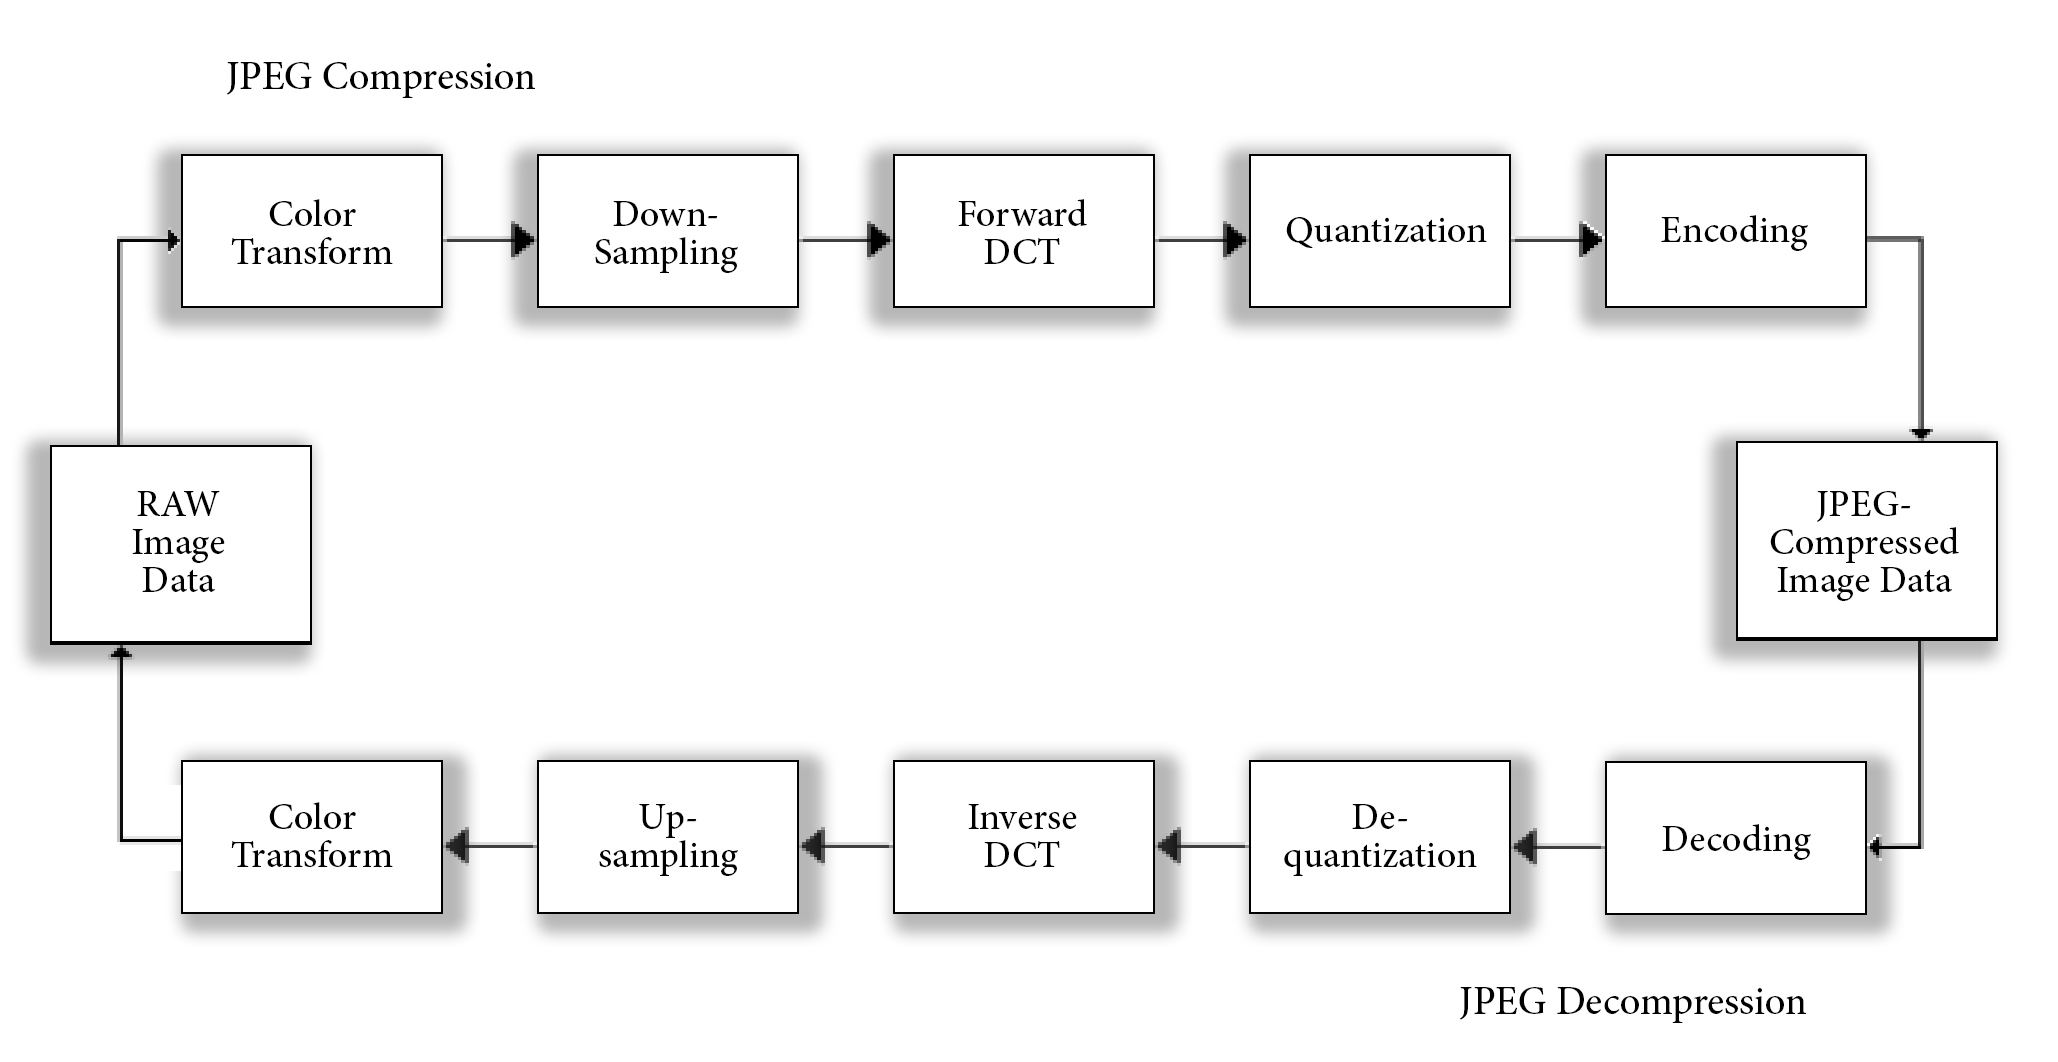

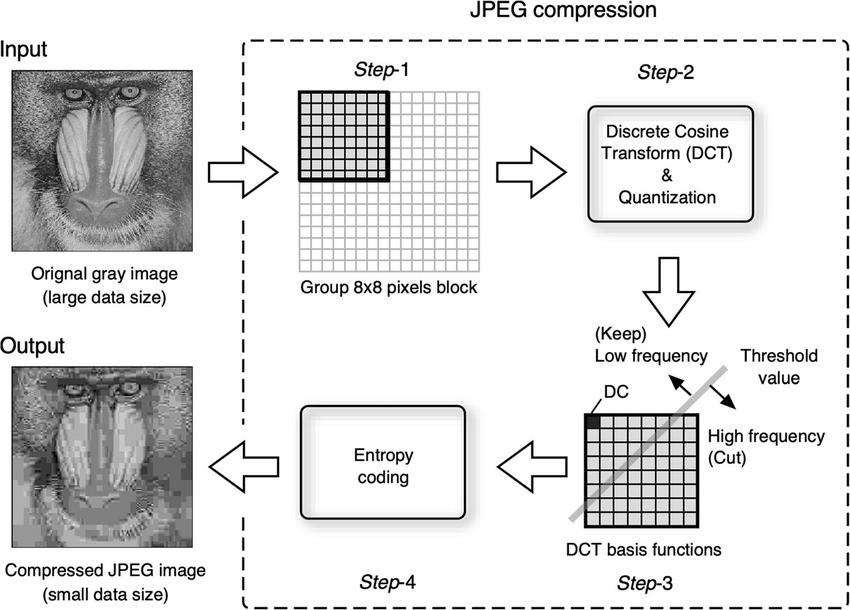

# Методы интерполяции изображений

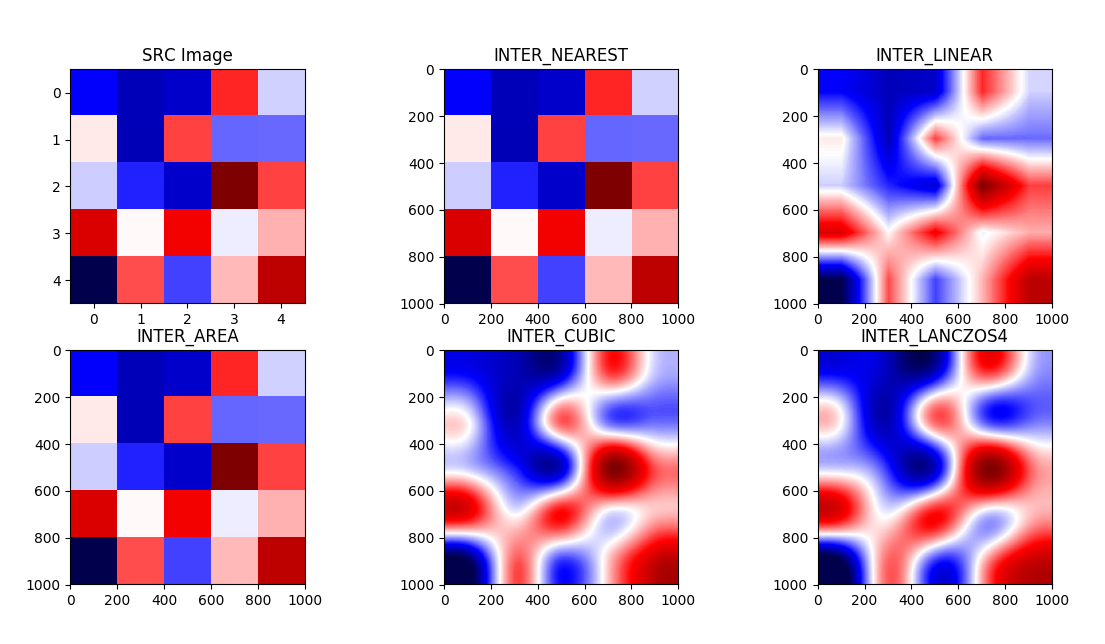

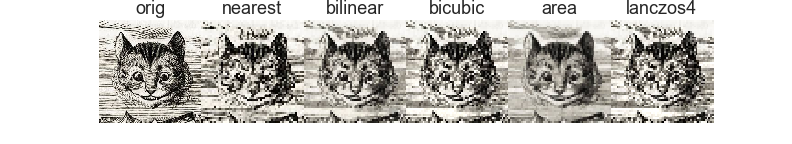

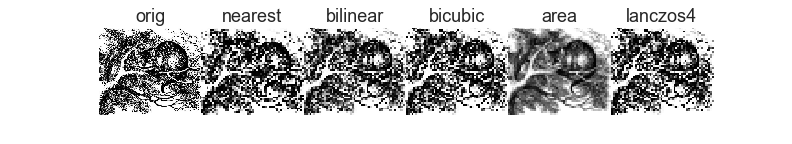

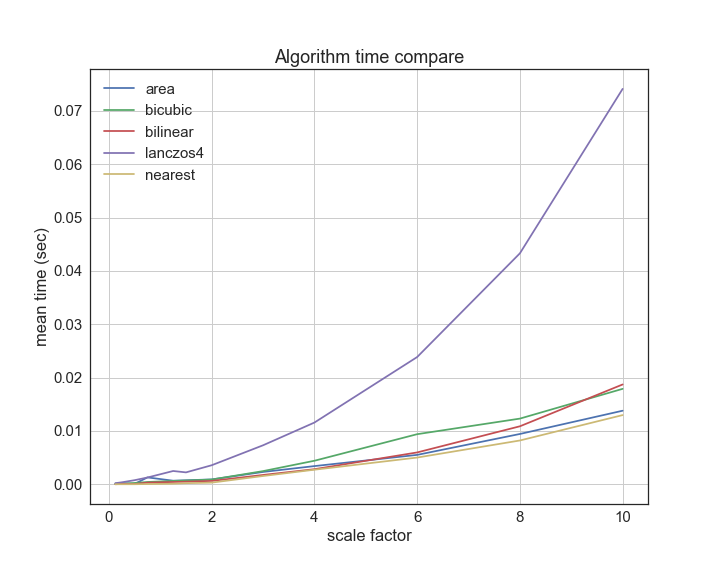

Т.к. в основном мы делаем ресайз в сторону уменьшения размера, то лучше всего юзать INTER_AREA, т.к. он сравнительно быстрый и точный. Метод основан на ближайших соседях.

# Как мы можем хранить изображения?

- **В файловой системе**
  
Плюсы:

    - Небольшой расход оперативной памяти
    - Наглядная визуализация
    - Универсальность
 
Минусы:

    - Производительность зависит от скорости чтения диска
    - Сложно переносить

- **В таблице (в оперативной памяти)**
  
Плюсы:

    - Скорость чтения не зависит от диска и, как правило, очень быстрая
    - Легко переносить
 
Минусы:

    - Расходуется много оперативной памяти

- **В файловом хранилище (например S3)**
  
Плюсы:

    - Экономия дискового пространства
 
Минусы:

    - Как правило, скорость зависит только от скорости сетевого чтения

- **В базе данных (например Sqlite)**
  
Плюсы:

    - Небольшой расход оперативной памяти
    - Легко переносить
 
Минусы:

    - Производительность зависит от скорости чтения диска


- **Что нибудь свое! (кейс: все картинки одинакового размера)**

Плюсы: 

     - Небольшой расход оперативной памяти
     - Легко переносить
     - На SSD диске будет быстрее чем все методы выше

Минусы:

    - Требует очень много дискового пространства (у нас скорее всего такого нет :( )

In [56]:
# Интерфейс для работы с датасетом изображений
from typing import *

from torch.utils.data import Dataset


class YourDataset(Dataset):
    def __len__(self) -> int:
        ...

    def __getitem__(self, idx: int) -> Any:
        ...


In [57]:
# Пишем датасет на файловой системе
...

# Фильтры над изображениями

## Фильтр усредненения

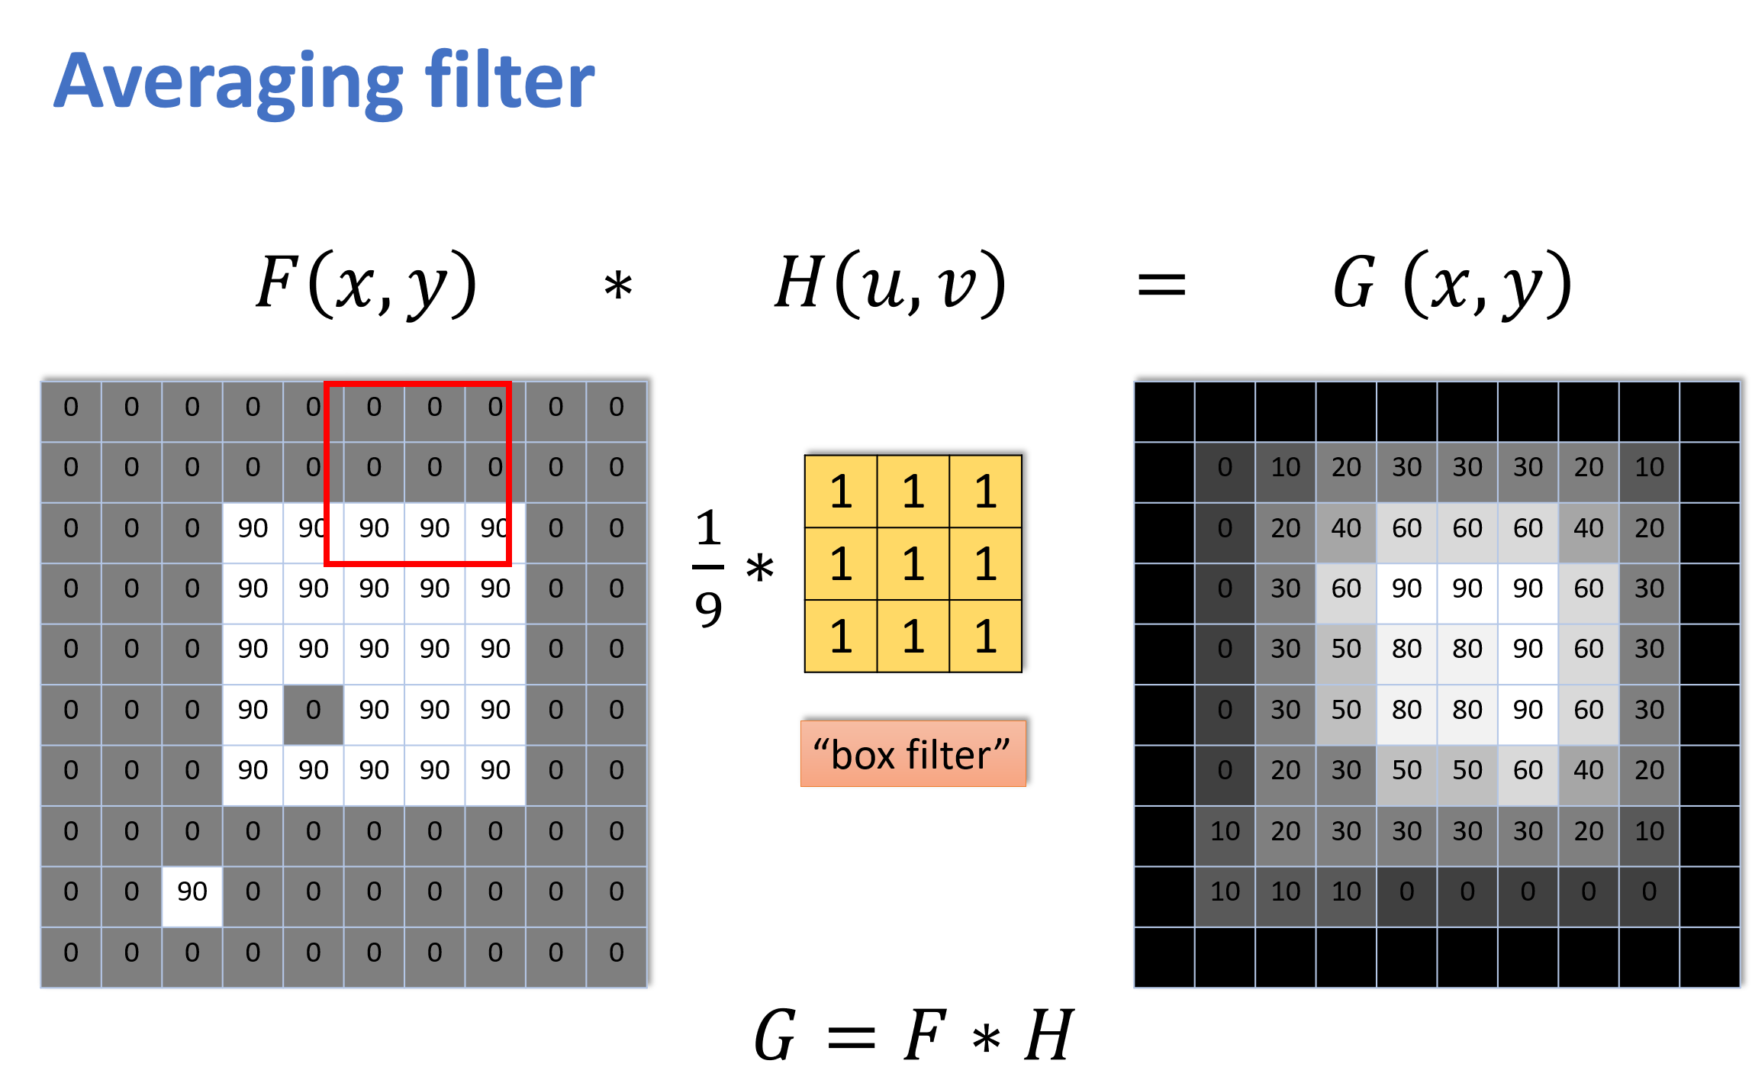

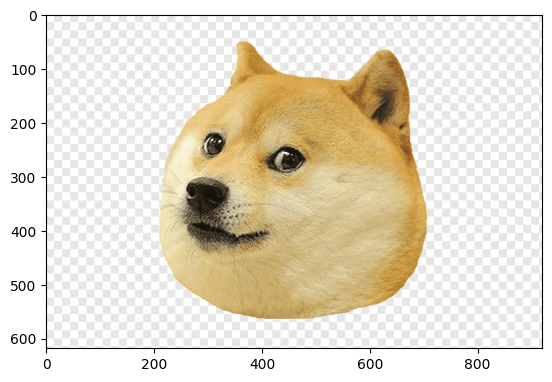

In [71]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

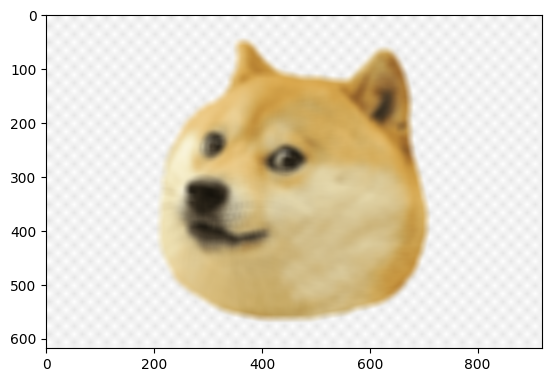

In [72]:
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size),np.float32) / kernel_size ** 2
image = cv2.filter2D(image, -1, kernel)
plt.imshow(image)

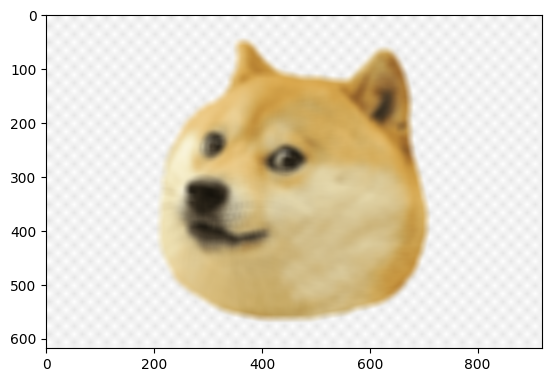

In [73]:
image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.blur(image, (kernel_size, kernel_size))
plt.imshow(image)

## Медианный фильтр

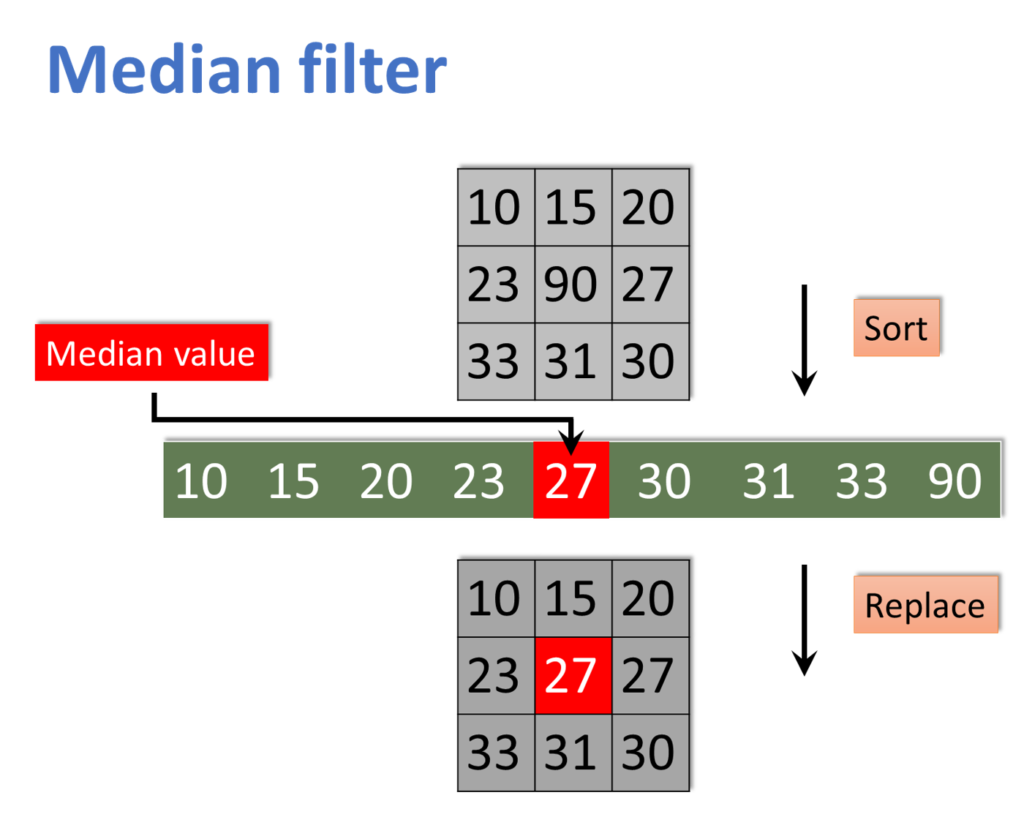

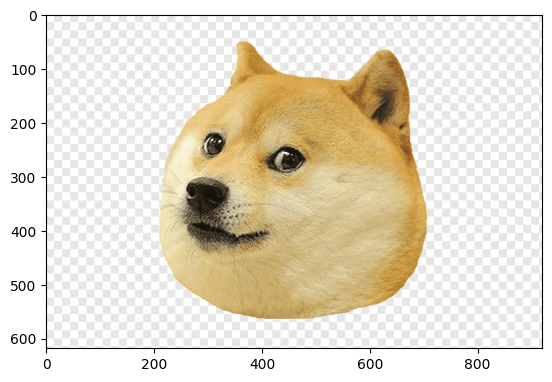

In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

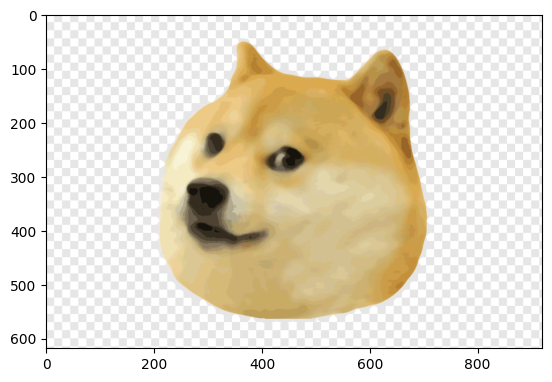

In [77]:
image = cv2.medianBlur(image, kernel_size)
plt.imshow(image)

## Фильтр Гаусса

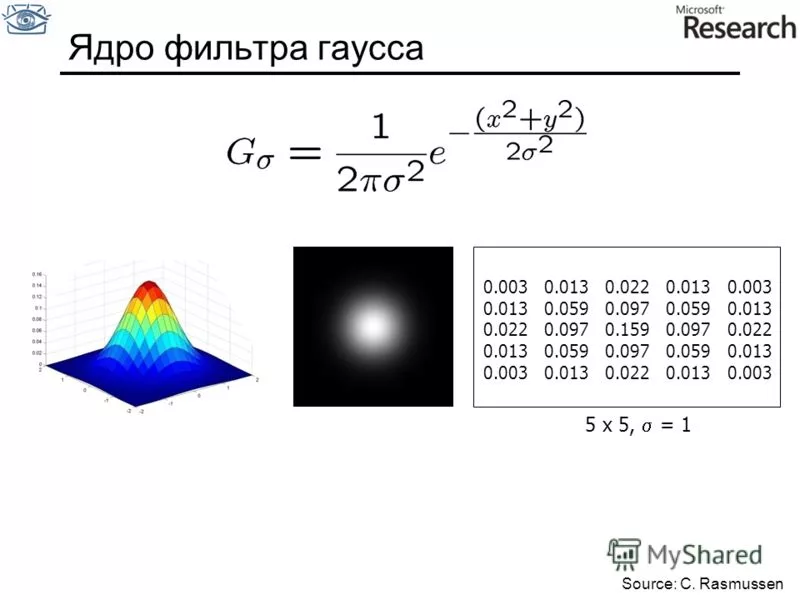

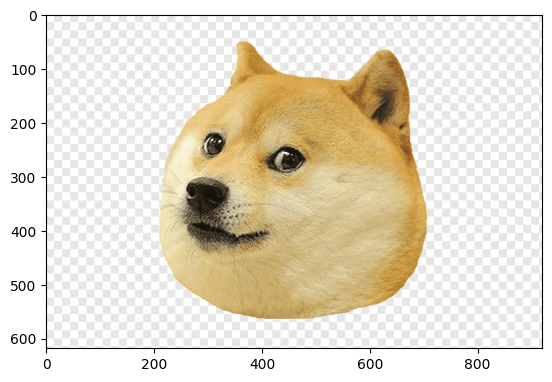

In [78]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

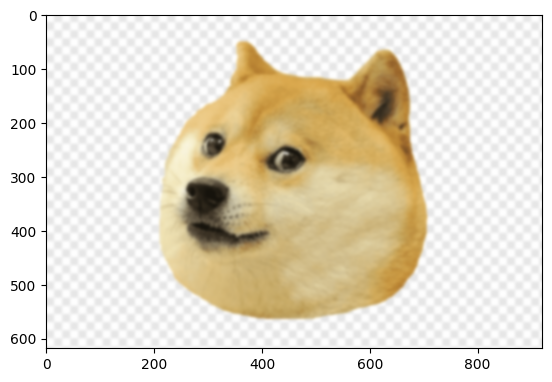

In [80]:
image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0.0)
plt.imshow(image)

# Морфологические преобразования

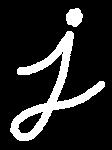

## Эрозия

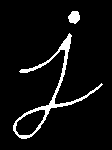

## Расширение

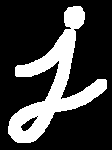

## Opening

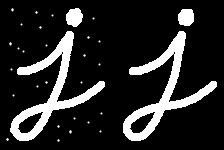

## Closing

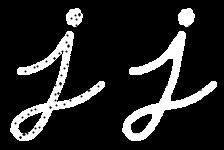

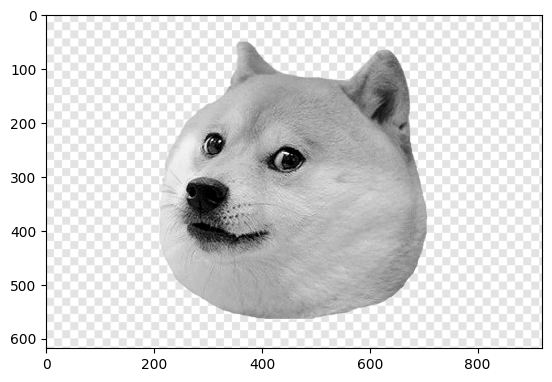

In [93]:
kernel_size = 25

image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

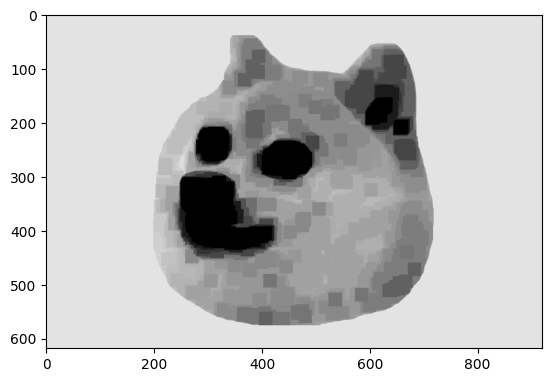

In [94]:
kernel = np.ones((kernel_size, kernel_size), np.uint8)
erosion = cv2.erode(image, kernel, iterations = 1)
plt.imshow(erosion, cmap='gray')

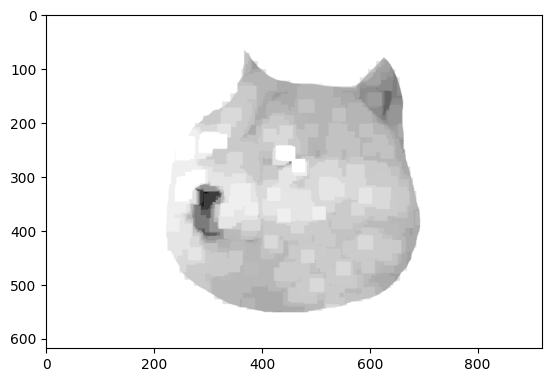

In [95]:
dilate = cv2.dilate(image, kernel, iterations = 1)
plt.imshow(dilate, cmap='gray')

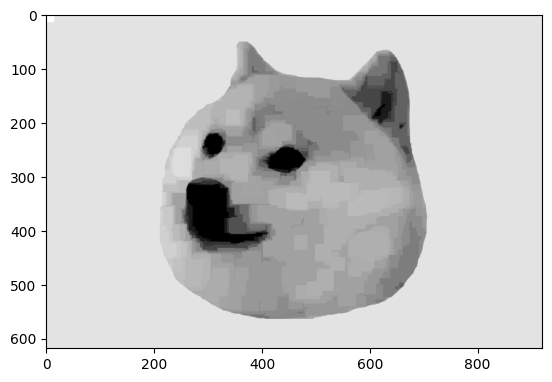

In [96]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

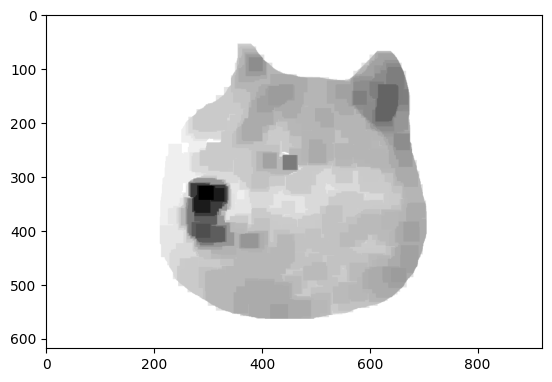

In [97]:
opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(opening, cmap='gray')

# Нормализация изображений

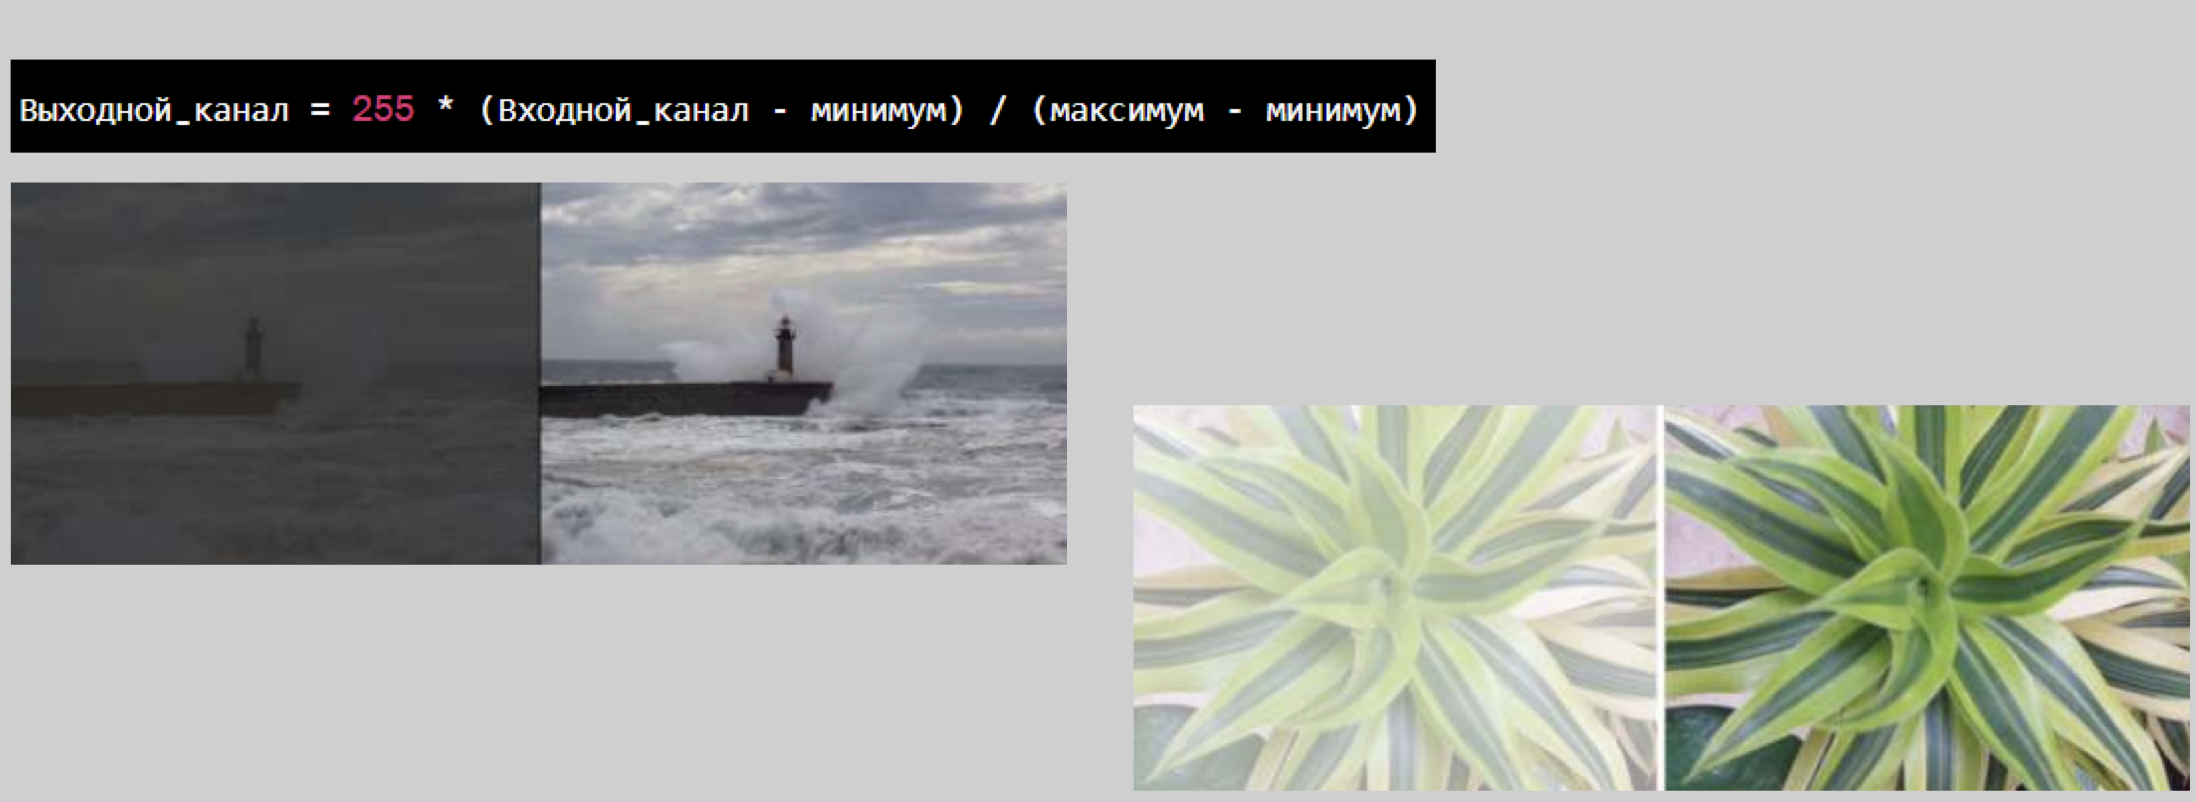

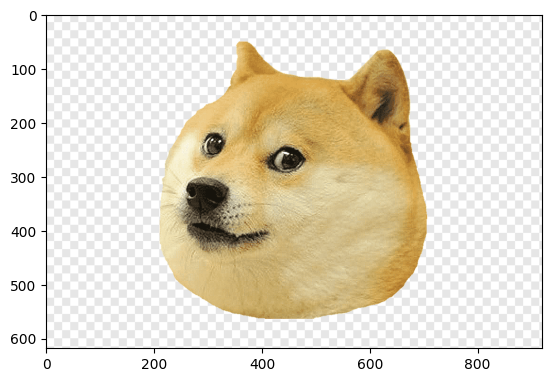

In [101]:
image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float32) / 255.0
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


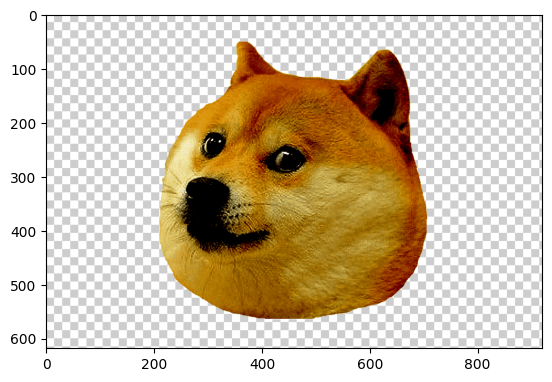

In [104]:
image_ = (image - 0.5) * 2
plt.imshow(image_)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


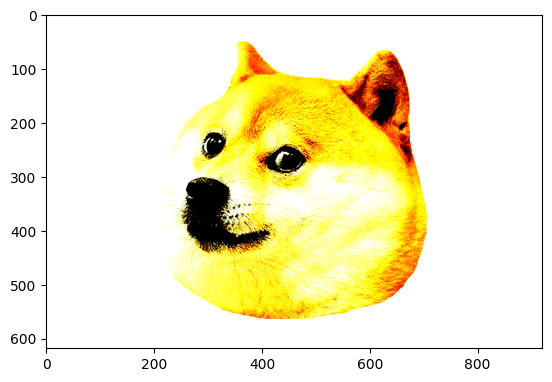

In [105]:
mean = np.asarray([0.485, 0.456, 0.406])[None, None, :]
std = np.asarray([0.229, 0.224, 0.225])[None, None, :]

image_ = (image - mean) / std
plt.imshow(image_)

# Бинаризация

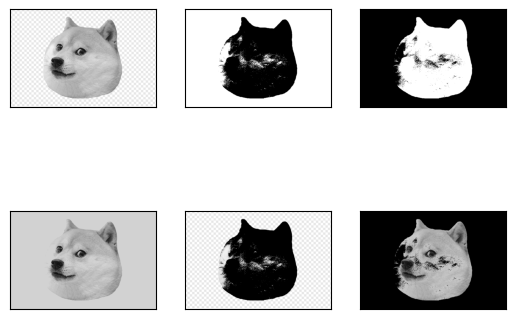

In [162]:
image = cv2.imread('assets/lesson1/1.png', cv2.IMREAD_GRAYSCALE)
threshold = 210

_, thresh1 = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO_INV)
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.xticks([]),plt.yticks([])
plt.show()

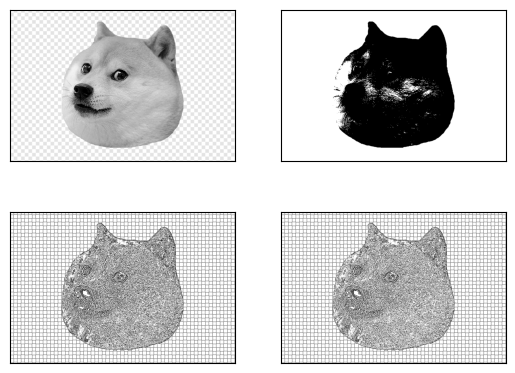

In [165]:
th2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 2)
th3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 2)

images = [image, thresh1, th2, th3]

for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.xticks([]),plt.yticks([])
plt.show()

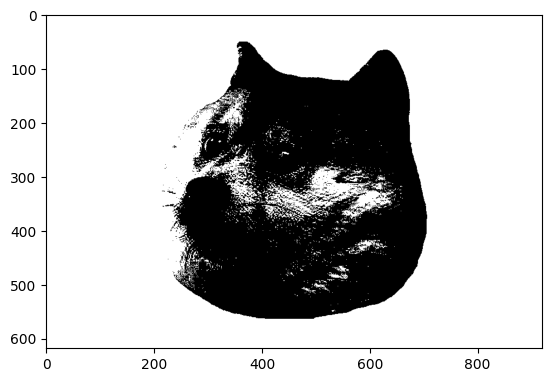

In [168]:
_,th2 = cv2.threshold(image.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th2, 'gray')

In [171]:
image.shape

(618, 920)

In [174]:
(th2 > 128).shape

(618, 920)

# Кодим !

In [238]:
import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image

class WrapperDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        data = self.dataset[idx]

        image = np.array(data[0])

        image = cv2.blur(image, (3, 3))

        image = Image.fromarray(image)
        data = (self.transform(image), data[1])
        return data
        


transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.0,), (1.0,))
    ]
)

# Create datasets for training & validation, download if necessary
training_set = WrapperDataset(
    torchvision.datasets.FashionMNIST('assets/lesson1/fashion_data', train=True, transform=None, download=True),
    transform
)
validation_set = WrapperDataset(
    torchvision.datasets.FashionMNIST('assets/lesson1/fashion_data', train=False, transform=None, download=True),
    transform
)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)


# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


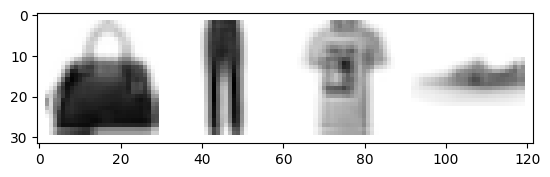

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)


In [240]:
import torch.nn as nn
import torch.nn.functional as F
import random
random.seed(0)
torch.manual_seed(0)

class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [241]:
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('Trainloss [{} %]: {}'.format(int(100 * i / len(training_loader)), last_loss))
            running_loss = 0.

    return last_loss

In [242]:
# mean, std = torch.zeros(1), torch.zeros(1)

# for data in training_loader:
#     inputs, _ = data
#     mean += inputs.view(inputs.shape[0], inputs.shape[1], inputs.shape[2] * inputs.shape[3]).mean(2).sum(0)
#     std += inputs.view(inputs.shape[0], inputs.shape[1], inputs.shape[2] * inputs.shape[3]).std(2).sum(0)

# mean /= len(training_loader) * training_loader.batch_size
# std /= len(training_loader) * training_loader.batch_size


In [243]:
# mean, std

In [244]:
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number)


    running_vloss = 0.0
    accuracy = 0.0
    num = 0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            accuracy += (vlabels == voutputs.argmax(-1)).sum()
            num += len(vlabels)

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    print('Accuracy {}'.format(accuracy / num))
    
    epoch_number += 1

EPOCH 1:
Trainloss [6 %]: 2.289740266561508
Trainloss [13 %]: 1.3161858136653901
Trainloss [19 %]: 0.8978202305175365
Trainloss [26 %]: 0.7840667145475745
Trainloss [33 %]: 0.745225113154389
Trainloss [39 %]: 0.7166879067784175
Trainloss [46 %]: 0.6885610869377852
Trainloss [53 %]: 0.6518358334503137
Trainloss [59 %]: 0.6122366061592475
Trainloss [66 %]: 0.5878401397578418
Trainloss [73 %]: 0.6045846813698299
Trainloss [79 %]: 0.5739948026244529
Trainloss [86 %]: 0.5561561424825341
Trainloss [93 %]: 0.5427149380074116
Trainloss [99 %]: 0.519049948847096
LOSS train 0.519049948847096 valid 0.553951621055603
Accuracy 0.794700026512146
EPOCH 2:
Trainloss [6 %]: 0.5225344107593409
Trainloss [13 %]: 0.49724207048735114
Trainloss [19 %]: 0.48258336668723495
Trainloss [26 %]: 0.4948016425556561
Trainloss [33 %]: 0.4588916765078902
Trainloss [39 %]: 0.46476950635173125
Trainloss [46 %]: 0.491167592323618
Trainloss [53 %]: 0.4559507462517358
Trainloss [59 %]: 0.45787590196589006
Trainloss [66 %]